MovieWriter ffmpeg unavailable; using Pillow instead.


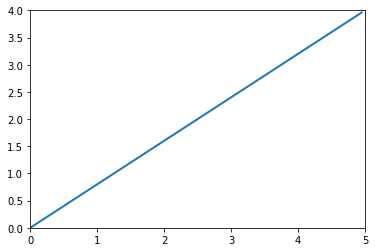

In [11]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Parameters
V_final = 4     # Final value of y at t = 5 seconds
duration = 5    # Duration of the ramp in seconds

# Create a blank figure and set axis limits
fig = plt.figure()
axis = plt.axes(xlim=(0, duration), ylim=(0, V_final))
line, = axis.plot([], [], lw=2)

# Initialize empty lists for x and y data
xdata, ydata = [], []

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Animation function that updates the line with new x and y data
def animate(i):
    # Calculate time based on frame number
    t = 0.05 * i  # Larger increments to speed up the animation
    
    # Stop adding points if t exceeds the duration
    if t <= duration:
        x = t
        y = V_final * (t / duration)  # Scale y to ramp up to V_final by the end of duration

        # Append new data points
        xdata.append(x)
        ydata.append(y)
        line.set_data(xdata, ydata)

    return line,

# Run the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(duration * 20),  # Fewer frames for faster playback
                               interval=50, blit=True)     # Increase interval to 50ms

# Save the animation (optional)
anim.save('y_ramp_animation_4V.gif', writer='ffmpeg', fps=20)

plt.show()
